# Grid Coloring
Adjacent Squares cannot have same color.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [2]:
def create_puzzle(length):
    
    def all_strangers():
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        nearby_states = [(state[0] + move[0], state[1] + move[1]) for state in states for move in moves]
        return list(set(nearby_states) - set(states))
    
    def random_stranger():
        return random.choices(all_strangers(), k=1)[0]
    
    def update_neighbours():
        neighbours = {}
        for state in states:
            neighbours[state] = []
            for move in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                possible_state = (state[0] + move[0], state[1] + move[1])
                if possible_state in states:
                    neighbours[state].append(possible_state)
        return neighbours
    
    states = [(0, 0)]
    neighbours = update_neighbours()
    
    for _ in range(length - 1):
        next_state = random_stranger()
        states.append(next_state)
        neighbours = update_neighbours()
    
    return states, neighbours

def plot_solution(colors, ax, show_number=True, fill_colors=['red', 'black', 'green', 'blue']):
    states = list(colors.keys())
    
    for state in states:
        if show_number:
            rect = plt.Rectangle((state[0]-0.5, state[1]-0.5), 1, 1, fill=False, lw=3)
            ax.add_patch(rect)
            ax.text(state[0], state[1], colors[state], horizontalalignment='center', verticalalignment='center')
        else:
            rect = plt.Rectangle((state[0]-0.5, state[1]-0.5), 1, 1, facecolor=fill_colors[colors[state]], fill=True, lw=3)
            ax.add_patch(rect)

    x = [s[0] for s in states]
    y = [s[1] for s in states]

    ax.set_xlim((min(x) - 1, max(x) + 1))
    ax.set_ylim((min(y) - 1, max(y) + 1))
    ax.set_aspect('equal')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
def find_search_order(states, neighbours):
    
    def distance(s1, s2):
        return abs((s1[0]-s2[0])**2 + (s1[1]-s2[1])**2)

    def uncolored_neighbours(state, colors):
        return [state for state in neighbours[state] if colors[state] is None]

    center = (sum(s[0] for s in states)/len(states), sum(s[1] for s in states)/len(states))
    _, start_state = min([(distance(state, center), state) for state in states], key=lambda x: x[0])

    pending_states=[start_state]
    scans = {}

    counter = 0
    visited_states = set()
    while pending_states:
        current_state = pending_states.pop(0)
        scans[current_state] = counter
        visited_states.add(current_state)

        for state in neighbours[current_state]:
            if state not in pending_states and state not in visited_states:
                pending_states.append(state)

        counter += 1

    return scans

def find_color_solutions(search_order, neighbours, k):
    
    def available_colors(state, colors):
        set_neighbour_colors = set(colors[state] for state in neighbours[state] if colors[state] is not None)
        result = list(set([0,1,2,3]) - set_neighbour_colors)
        return result

    def rsearch(colors={s: None for s in states}, order=0, solutions=[]):
        if len(solutions) == k * 10 ** (k // 4):
            return
        
        if order == len(sorted_states):
            solutions.append(colors)
            return

        current_state = sorted_states[order]
        for color in available_colors(current_state, colors):
            new_colors = colors.copy()
            if color in available_colors(current_state, colors):
                new_colors[current_state] = color
                rsearch(new_colors, order + 1)

        return solutions
    
    sorted_states = {v:k for k,v in search_order.items()}
    colors_solutions = rsearch()
    
    return random.choices(colors_solutions, k=min(k, len(colors_solutions)))

# Simulation

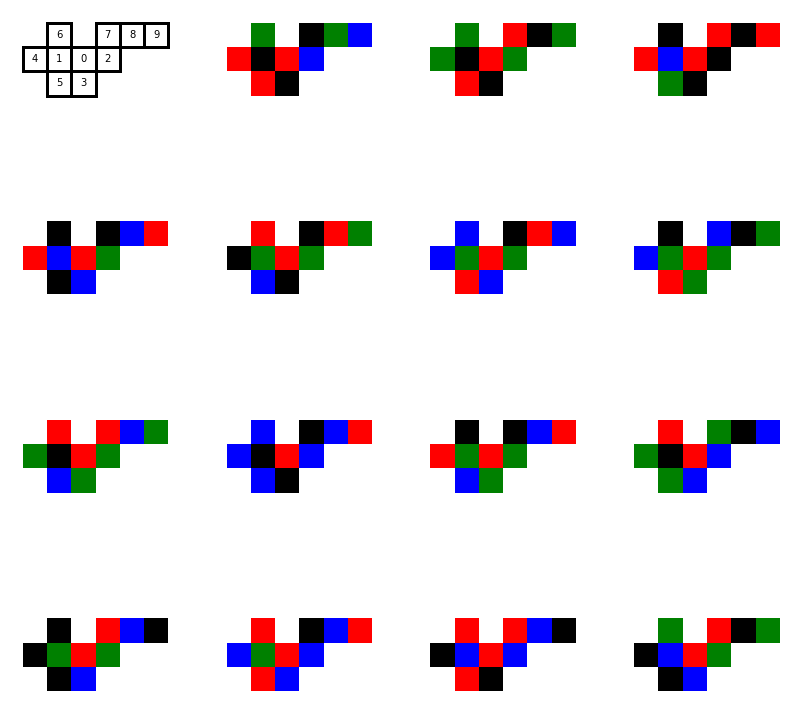

In [3]:
nrows = 4
ncols = 4
nblocks = 10
plot_box_size = 3.5

states, neighbours = create_puzzle(nblocks)
search_order = find_search_order(states, neighbours)
colors_solutions = find_color_solutions(search_order, neighbours, nrows*ncols-1)

fig, axes = plt.subplots(figsize=(plot_box_size*ncols, plot_box_size*nrows), nrows=nrows, ncols=ncols)
axes = axes.flatten()

for ax in axes:
    ax.axis('off')

plot_solution(search_order, axes[0], show_number=True)

for ax, colors in zip(axes[1:], colors_solutions):
    plot_solution(colors, ax, show_number=False)
    
plt.show()